# Credit Scoring Prediction Project

## Introduction
In this project, we aim to utilize a customer's financial transactions and current financial status to predict credit risk and forecast potential defaults. The dataset contains data about 1000 customers with 84 features, including both numerical and categorical variables. The main objectives are to predict whether a customer will default (classification) and to forecast the customer's credit score (regression).

## Data Exploration
### Dataset Description
The dataset consists of various features extracted from customers' financial transactions and current financial status. The features include income, savings, debt, and various ratios related to these financial metrics, along with categorical features like gambling category, debt status, credit card ownership, etc.

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
from sklearn import set_config
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPClassifier
from plotly import express as px

In [9]:
set_config(transform_output="pandas")

# Load the data
df = pd.read_csv("https://raw.githubusercontent.com/jnin/information-systems/main/data/AI2_23_24_credit_score.csv")

# Drop the 'CUST_ID' column
df = df.drop(columns=['CUST_ID'])

# Create the feature matrix X and the target array y
X = df.drop(columns=['DEFAULT', 'CREDIT_SCORE'])  # Drop the target variable and any other non-feature columns
y = df['DEFAULT']  # Target variable for classification

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Display the first few rows of the dataset
df.head()

,INCOME,SAVINGS,DEBT,R_SAVINGS_INCOME,R_DEBT_INCOME,R_DEBT_SAVINGS,T_CLOTHING_12,T_CLOTHING_6,R_CLOTHING,R_CLOTHING_INCOME,...,CAT_DEBT,CAT_CREDIT_CARD,CAT_MORTGAGE,CAT_SAVINGS_ACCOUNT,CAT_DEPENDENTS,CREDIT_SCORE,DEFAULT,CAT_LOCATION,CAT_MARITAL_STATUS,CAT_EDUCATION
0,33269,0.0,532304,0.0000,16.0000,1.2000,1889,945,0.5003,0.0568,...,1,0,0,0.0,0,444,1,Phoenix,Married,Postgraduate
1,77158,91187.0,315648,1.1818,4.0909,3.4615,5818,111,0.0191,0.0754,...,1,0,0,1.0,0,625,0,Boston,Widowed,Postgraduate
2,30917,21642.0,534864,0.7000,17.3000,24.7142,1157,860,0.7433,0.0374,...,1,0,0,1.0,0,469,1,San Francisco,Married,High School
3,80657,64526.0,629125,0.8000,7.8000,9.7499,6857,3686,0.5376,0.0850,...,1,0,0,1.0,0,559,0,Los Angeles,Single,Postgraduate
4,149971,1172498.0,2399531,7.8182,16.0000,2.0465,1978,322,0.1628,0.0132,...,1,1,1,1.0,1,473,0,Boston,Married,Postgraduate


              INCOME       SAVINGS          DEBT  R_SAVINGS_INCOME  \
count    1000.000000  9.950000e+02  1.000000e+03        995.000000   
mean   121610.019000  4.108862e+05  7.907180e+05          4.051227   
std    113716.699591  4.424769e+05  9.817904e+05          3.964322   
min         0.000000  0.000000e+00  0.000000e+00          0.000000   
25%     30450.250000  5.931950e+04  5.396675e+04          1.000000   
50%     85090.000000  2.699500e+05  3.950955e+05          2.500000   
75%    181217.500000  6.164030e+05  1.193230e+06          6.314200   
max    662094.000000  2.911863e+06  5.968620e+06         16.111200   

       R_DEBT_INCOME  R_DEBT_SAVINGS  T_CLOTHING_12  T_CLOTHING_6  \
count    1000.000000      995.000000    1000.000000   1000.000000   
mean        6.068449        5.890861    6822.401000   3466.320000   
std         5.847878       16.827031    7486.225932   5118.942977   
min         0.000000        0.000000       0.000000      0.000000   
25%         1.454500    

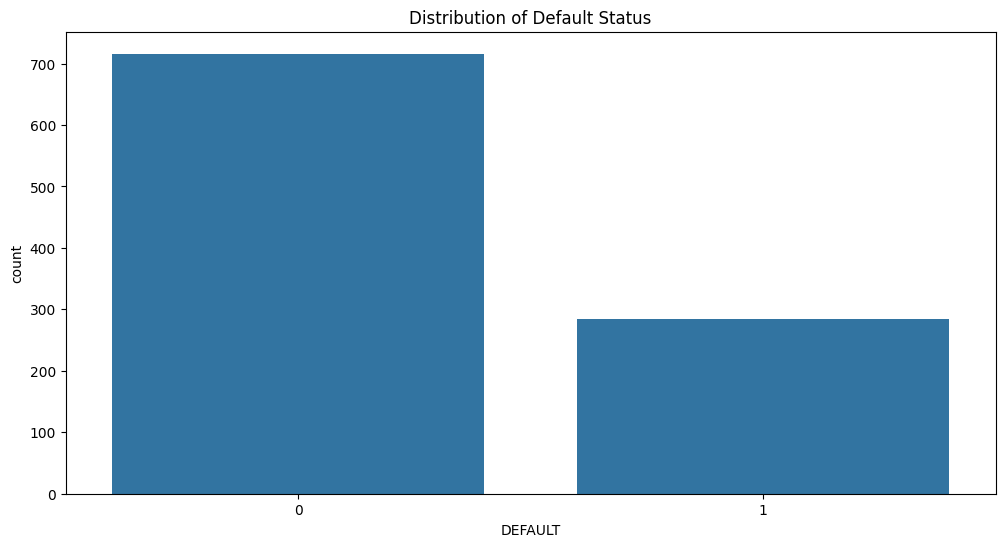

In [10]:
# Summary statistics
print(df.describe())

# Visualizing the distribution of target variables
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.countplot(x='DEFAULT', data=df)
plt.title('Distribution of Default Status')
plt.show()

# Data Preprocessing

In [11]:
# Identifying categorical and numerical columns
categorical_features = X_train.select_dtypes(include=["object"]).columns.to_list()
numerical_features = X_train.select_dtypes(include=["float", "int"]).columns.to_list()

# Pipeline for numerical attributes
numerical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Pipeline for categorical attributes
categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# Full pipeline
full_pipeline = ColumnTransformer(transformers=[
    ('num', numerical_pipeline, numerical_features),
    ('cat', categorical_pipeline, categorical_features)
])

# Model Building

In [12]:
# Creating the final pipeline with the MLPClassifier
pipe = Pipeline(steps=[
    ('preprocessor', full_pipeline),
    ('classifier', MLPClassifier(early_stopping=True, max_iter=250, random_state=42))
])

# Train the model
pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['INCOME', 'SAVINGS', 'DEBT',
                                                   'R_SAVINGS_INCOME',
                                                   'R_DEBT_INCOME',
                                                   'R_DEBT_SAVINGS',
                                                   'T_CLOTHING_12',
                                                   'T_CLOTHING_6', 'R_CLOTHING',
                                                   'R_CLOTHING_INCOME',
                                                   'R_CLOTHING_SAVINGS',
                                                   'R_CLOTHING_DEBT',
                                                   'T_EDUCATION_12',
                                                   'T_EDU...
                                                   'R_FINES', 'R_FINES_INCOME',
                                                   'R_FINES_SAVINGS',
                                                   'R_FINES_DEBT', ...]),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['CAT_GAMBLING',
                                                   'CAT_LOCATION',
                                                   'CAT_MARITAL_STATUS',
                                                   'CAT_EDUCATION'])])),
                ('classifier',
                 MLPClassifier(early_stopping=True, max_iter=250,
                               random_state=42))])

# Hyperparameter Tuning

In [13]:
# Parameter grid for hyperparameter tuning
param_grid = {
    'classifier__hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'classifier__activation': ['tanh', 'relu'],
    'classifier__solver': ['sgd', 'adam'],
    'classifier__alpha': [0.0001, 0.005, 0.01],
    'classifier__learning_rate_init': [0.001, 0.005, 0.01],
    'classifier__beta_1': [0.9, 0.95],
}

# Create the GridSearchCV object
grid = GridSearchCV(pipe, param_grid, cv=3, scoring='accuracy')

# Fit the GridSearchCV object to the training data
grid.fit(X_train, y_train)

# Store the score achieved by the best hyperparameter combination
training_score = grid.best_score_

# Output the best parameters and score
print("Best parameters:", grid.best_params_)
print("Best cross-validated accuracy:", training_score)


Best parameters: {'classifier__activation': 'relu', 'classifier__alpha': 0.0001, 'classifier__beta_1': 0.9, 'classifier__hidden_layer_sizes': (50, 50), 'classifier__learning_rate_init': 0.01, 'classifier__solver': 'adam'}
Best cross-validated accuracy: 0.7266666666666666


## Hyperparameters Explanation:

**hidden_layer_sizes**: This grid tests not only a different number of neurons per layer but also different depths of the network. A deeper network with more layers (e.g., (50, 100, 50)) can model more complex functions but also poses a higher risk of overfitting.

**activation**: Both 'tanh' and 'relu' are common activation functions. 'tanh' outputs values in [-1, 1] which can sometimes help with learning in the early stages. 'relu', on the other hand, is computationally efficient and helps prevent vanishing gradients, especially in deeper networks.

**solver**: Testing both 'sgd' and 'adam' to find which optimizer performs better for this particular dataset. 'sgd' stands for Stochastic Gradient Descent and 'adam' is an adaptive learning method, which is generally faster and more efficient.

**alpha**: Regularization term. The range is chosen to see whether a smaller (0.0001) or larger (0.01) regularization term will help to improve the model by preventing overfitting.

**learning_rate_init**: The initial learning rate can greatly affect the training process. The grid explores whether a smaller or larger initial rate helps the model converge better.

**beta_1**: These are hyperparameters of the 'adam' optimizer that control the exponential decay rates of the moving averages of past gradients. They are included to fine-tune the 'adam' optimizer's performance further.

# Model Evaluation

In [14]:
# Compute the score (accuracy) on the test set
score = grid.score(X_test, y_test)

# Output the generalization score
print("Generalization score (accuracy) on the test set:", score)

Generalization score (accuracy) on the test set: 0.716


# Denoising Autoencoder

In [15]:
# Apply transformations to X_test and X_train
X_train_preprocessed = full_pipeline.fit_transform(X_train)
X_test_preprocessed = full_pipeline.transform(X_test)

# Adding Gaussian noise to the scaled numeric data to simulate real-world data imperfections
noise_factor = 0.5
X_train_noisy = X_train_preprocessed + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_train_preprocessed.shape)
X_test_noisy = X_test_preprocessed + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_test_preprocessed.shape)

# Ensuring that the noisy data remains within the [0, 1] range
X_train_noisy = np.clip(X_train_noisy, 0., 1.)
X_test_noisy = np.clip(X_test_noisy, 0., 1.)

# Define the autoencoder architecture
input_size = X_train_noisy.shape[1]

# Define the input layer
input_layer = Input(shape=(input_size,), name='input')

# Define the encoding layers
encoded = Dense(128, activation='relu')(input_layer)
encoded = Dense(64, activation='relu')(encoded)

# Define and name the bottleneck layer
bottleneck = Dense(3, activation='relu', name='bottleneck')(encoded)

# Define the decoding layers
decoded = Dense(64, activation='relu')(bottleneck)
decoded = Dense(128, activation='relu')(decoded)

# Define the output layer
output_layer = Dense(input_size, activation='sigmoid')(decoded)

# Compile the autoencoder
autoencoder = Model(inputs=input_layer, outputs=output_layer)
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Summary of the model
autoencoder.summary()

# Training the autoencoder
autoencoder.fit(X_train_noisy, X_train_preprocessed,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(X_test_noisy, X_test_preprocessed))


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input (InputLayer)              │ (None, 109)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        14,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bottleneck (Dense)              │ (None, 3)              │           195 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 109)            │        14,061 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 45,168 (176.44 KB)

 Trainable params: 45,168 (176.44 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 144ms/step - loss: 0.9911 - val_loss: 1.3176
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 1.0064 - val_loss: 1.3117
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.9967 - val_loss: 1.2991
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 1.0031 - val_loss: 1.2772
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.9646 - val_loss: 1.2452
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.9104 - val_loss: 1.2079
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.8500 - val_loss: 1.1757
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.8339 - val_loss: 1.1558
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.8061 - val_loss: 1.1468
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.8080 - val_loss: 1.1437
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.7672 - val_loss: 1.1426
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.7993 - val_loss: 1.1416


In [17]:
# Define the encoder part of the autoencoder (up to the bottleneck layer)
encoder_model = Model(inputs=autoencoder.input, outputs=autoencoder.get_layer('bottleneck').output)

# Compile the encoder model
encoder_model.compile(optimizer='adam', loss='mse')

# Use the encoder model to transform the preprocessed data into embeddings
embeddings_train = encoder_model.predict(X_train_preprocessed)
embeddings_test = encoder_model.predict(X_test_preprocessed)

# Visualize the encoded feature matrix
embeddings_train_df = pd.DataFrame(embeddings_train, columns=['x', 'y', 'z'])
embeddings_train_df['DEFAULT'] = y_train.values

embeddings_test_df = pd.DataFrame(embeddings_test, columns=['x', 'y', 'z'])
embeddings_test_df['DEFAULT'] = y_test.values

fig = px.scatter_3d(embeddings_train_df, x='x', y='y', z='z', color='DEFAULT', title="3D Scatter Plot of Training Embeddings")
fig.show()

fig = px.scatter_3d(embeddings_test_df, x='x', y='y', z='z', color='DEFAULT', title="3D Scatter Plot of Test Embeddings")
fig.show()

# Observations and Insights
print("Observations and Insights:")
print("1. The 3D scatter plots show the distribution of the embeddings for the training and test data.")
print("2. Check if there is a clear separation between the default and non-default customers.")
print("3. Analyze if the clusters are dense and separate, indicating good compression and feature extraction by the autoencoder.")

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


Observations and Insights:
1. The 3D scatter plots show the distribution of the embeddings for the training and test data.
2. Check if there is a clear separation between the default and non-default customers.
3. Analyze if the clusters are dense and separate, indicating good compression and feature extraction by the autoencoder.


The provided three-dimensional scatter plot is a representation of the customers' data after being compressed by the autoencoder into three significant features. This compression is crucial for predicting customer default because:

**Discrimination of Default vs. Non-Default**: The colors represent whether a customer will default (1) or not (0), and we observe that customers who default are grouped together and separate from those who do not, this indicates that the autoencoder has learned a meaningful representation of the features that contribute to defaulting. This differentiation is essential for a predictive model's accuracy.

**Dimensionality Reduction for Predictive Modeling**: By reducing the feature space to three dimensions, we reduce the risk of overfitting that might occur with higher-dimensional data. If these three dimensions retain the variance necessary to distinguish between the two outcomes, the model's ability to generalize to new, unseen data could be improved, leading to more reliable predictions.

**Interpretability of Compressed Features**: The compressed features might reveal certain patterns or combinations of original features that correlate strongly with the likelihood of defaulting. While deep learning models, including autoencoders, are often considered black boxes, such a visualization helps in gaining insights into what the model might be considering important.

**Cluster Density and Spread**: A good separation between dense clusters can suggest that the autoencoder has not only learned to compress the data but also to enhance the aspects that are relevant to the prediction task. In contrast, if the clusters are too spread out or there is significant overlap between customers who default and those who do not, the model may require further tuning.

**Robustness to Noise**: Given the nature of financial data, robustness against noise and outliers is important. If the clusters are distinct despite the stochastic nature of customers' financial behavior, the model could be considered robust and reliable for the prediction task.

The plot serves as a qualitative assessment tool. For a quantitative assessment, one would need to measure the performance of the classifier built on top of these embeddings against a hold-out test set or via cross-validation. If the autoencoder embeddings lead to a classifier that outperforms other benchmark models, this would validate the quality of the compression and its suitability for the default prediction task.